In [1]:
# IMPORTING LIBRARIES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [2]:
#READING DATA
df = pd.read_csv('diwali_sales_data.csv',encoding='unicode_escape')

In [3]:
#PRELIMINARY CHECK OF DATA SHAPE
df.shape

(11251, 15)

In [4]:
#READING A SAMPLE PORTION OF DATA
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning

The first step in Data Cleaning in this project is to find out if any column contains NULL Values, using df.info() function.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


As we can observe that Status and unnamed1 columns have zero NOT NULL values. This implies that all of their values are NULL. Hence, we will drop them. We can observe that Amount column has comparitively less NOT NULL values.

In [6]:
df.drop(['Status','unnamed1'],axis = 1, inplace = True)

Next, let us check out how many NULL values do we have left in each column.

In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

Let's drop the rows containing NULL values.

In [8]:
df.dropna(inplace=True)

To check whether this worked, we will see the shape of the dataframe.

In [9]:
df.shape

(11239, 13)

## Exploratory Data Analysis (EDA)

In [10]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### Gender

From the visual data below, we can observe that most of the buyers are females and even the purchasing power of females are greater than males.


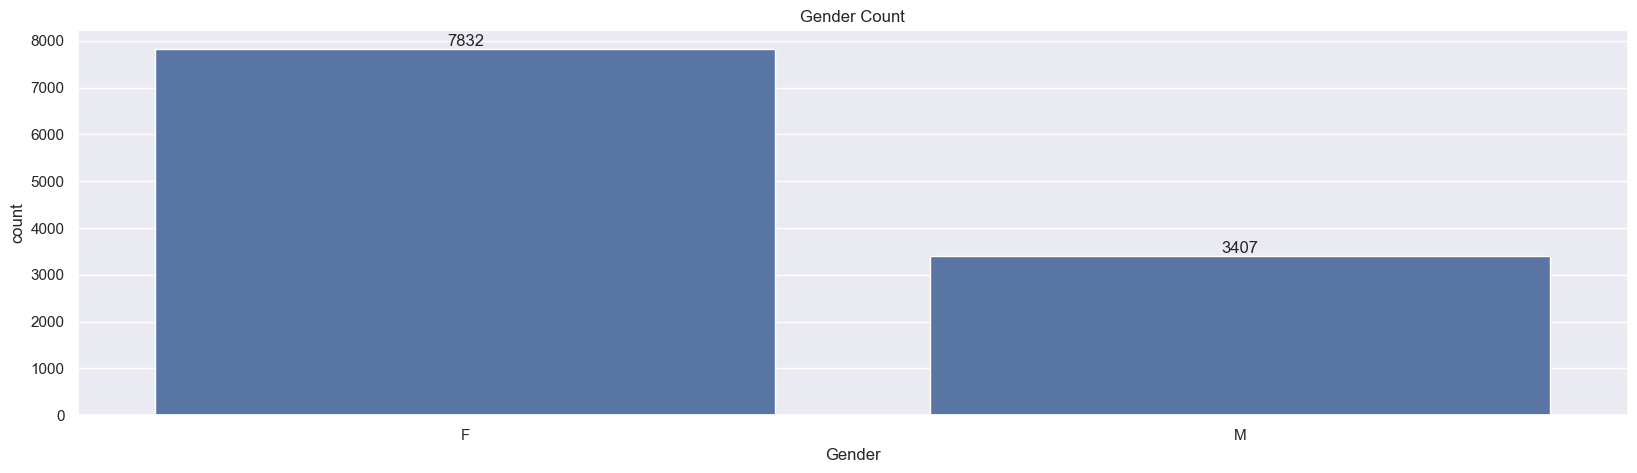

In [25]:
# plotting a bar chart for Gender and its count
ax = sns.countplot(x = 'Gender',data = df)
plt.title("Gender Count")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Gender Total Amount'}, xlabel='Gender', ylabel='Amount'>

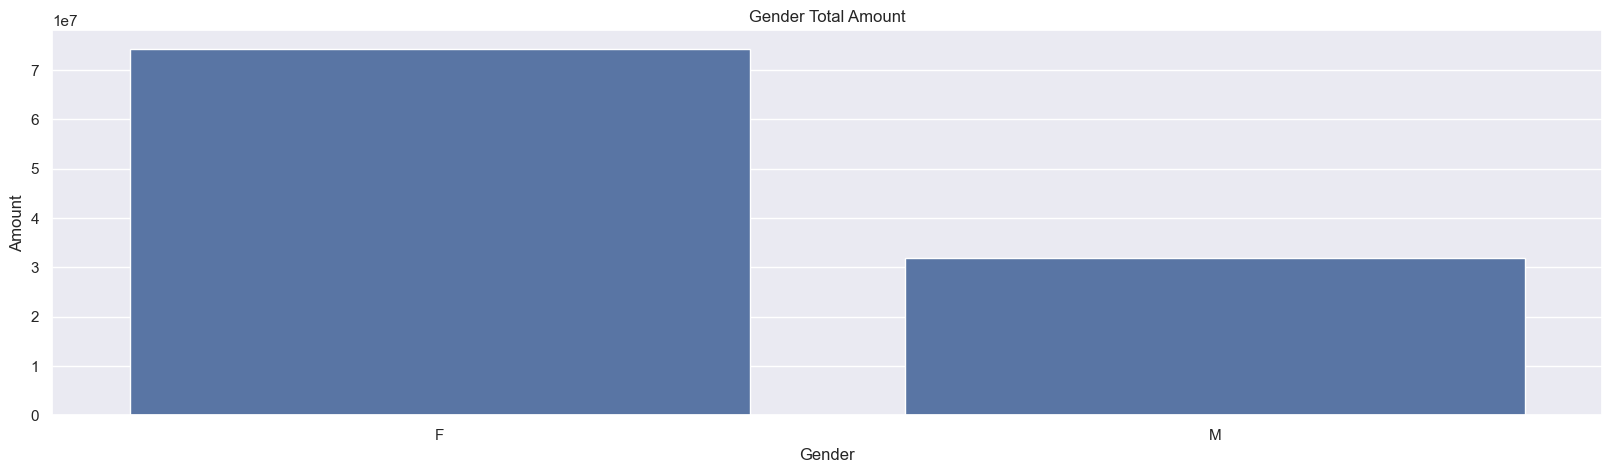

In [26]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Gender Total Amount")
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

### Age

From the visual data below, we can observe that most of the buyers are of age group between 26 and 35 years and are females.

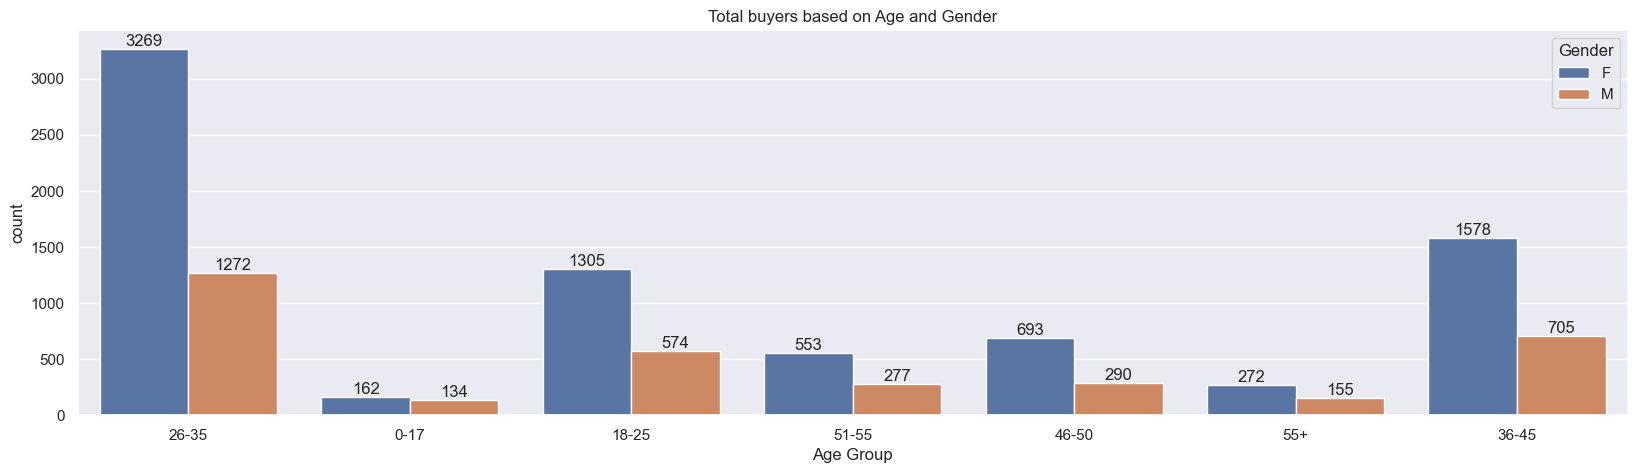

In [27]:
#Age
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.title("Total buyers based on Age and Gender")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Total Amount Vs Age Group'}, xlabel='Age Group', ylabel='Amount'>

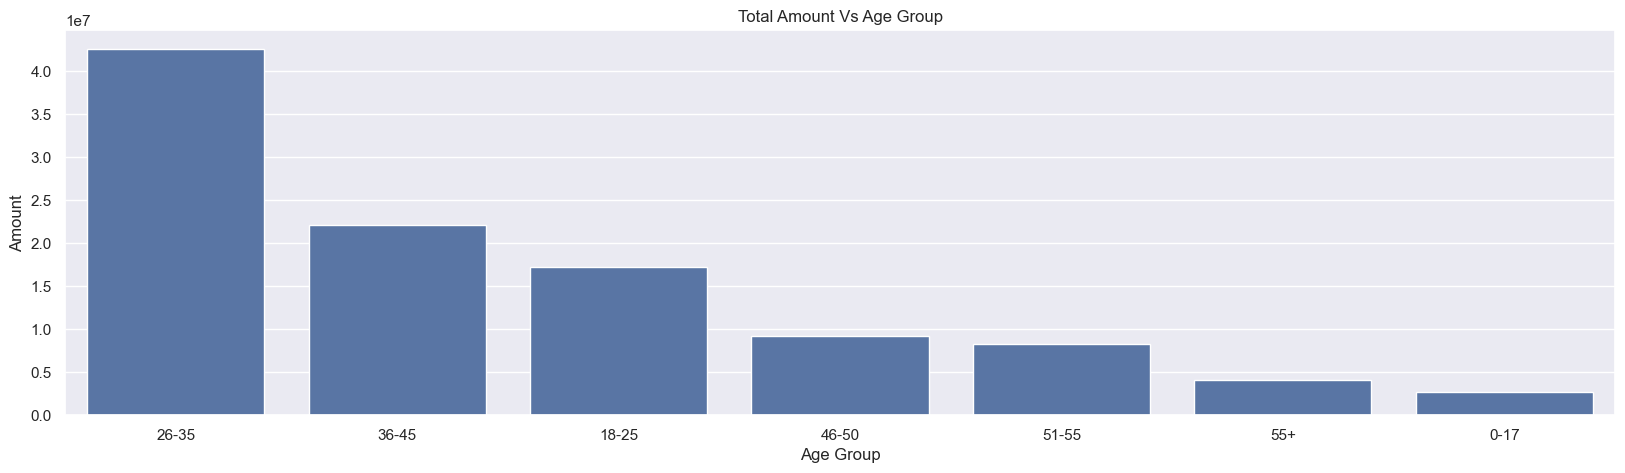

In [33]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Total Amount Vs Age Group")
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

### States

From the visual data below, we can observe that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.


<Axes: title={'center': 'Total no of orders from top 10 States'}, xlabel='State', ylabel='Orders'>

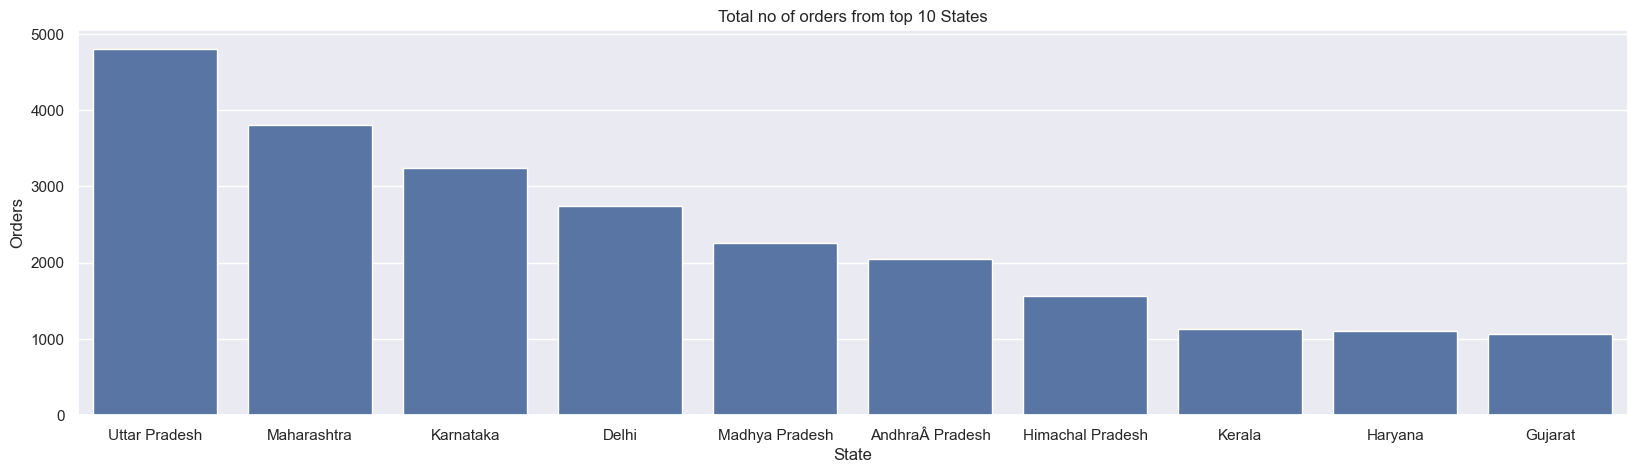

In [34]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.title("Total no of orders from top 10 States")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: title={'center': 'Total Amount from top 10 States'}, xlabel='State', ylabel='Amount'>

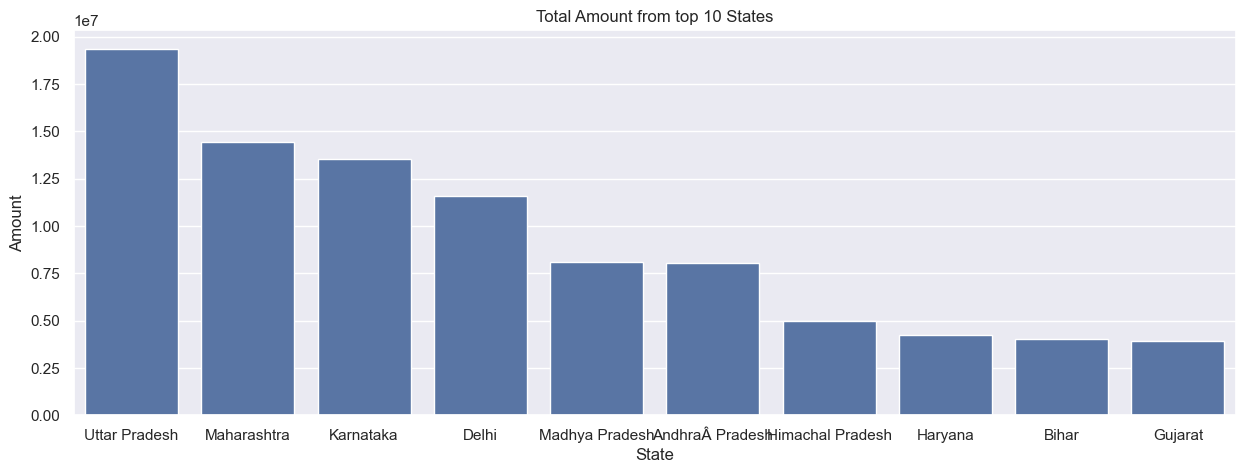

In [35]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.title("Total Amount from top 10 States")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

### Marital Status

From the visual data below, we can observe that most of the buyers are married (women) and they have high purchasing power.


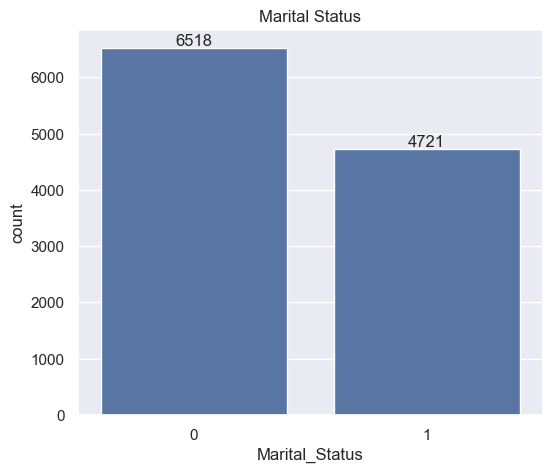

In [45]:
#MARITAL STATUS
ax = sns.countplot(data = df, x = 'Marital_Status')
plt.title("Marital Status")
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Marital Status based on Amount'}, xlabel='Marital_Status', ylabel='Amount'>

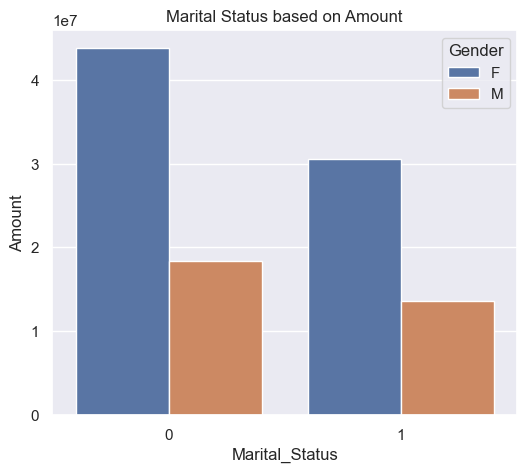

In [47]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Marital Status based on Amount")
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

### Occupation

From the below visual data, we can see that most of the buyers are working in IT, Healthcare and Aviation sector.

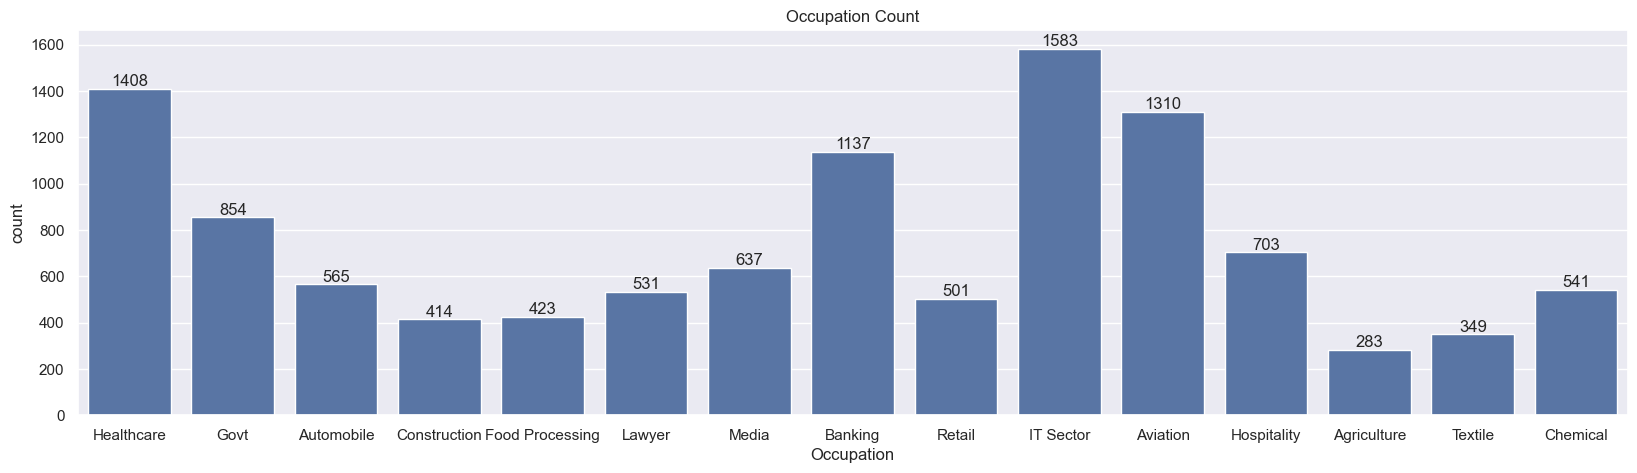

In [48]:
#occupation
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')
plt.title("Occupation Count")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Occupation vs Amount'}, xlabel='Occupation', ylabel='Amount'>

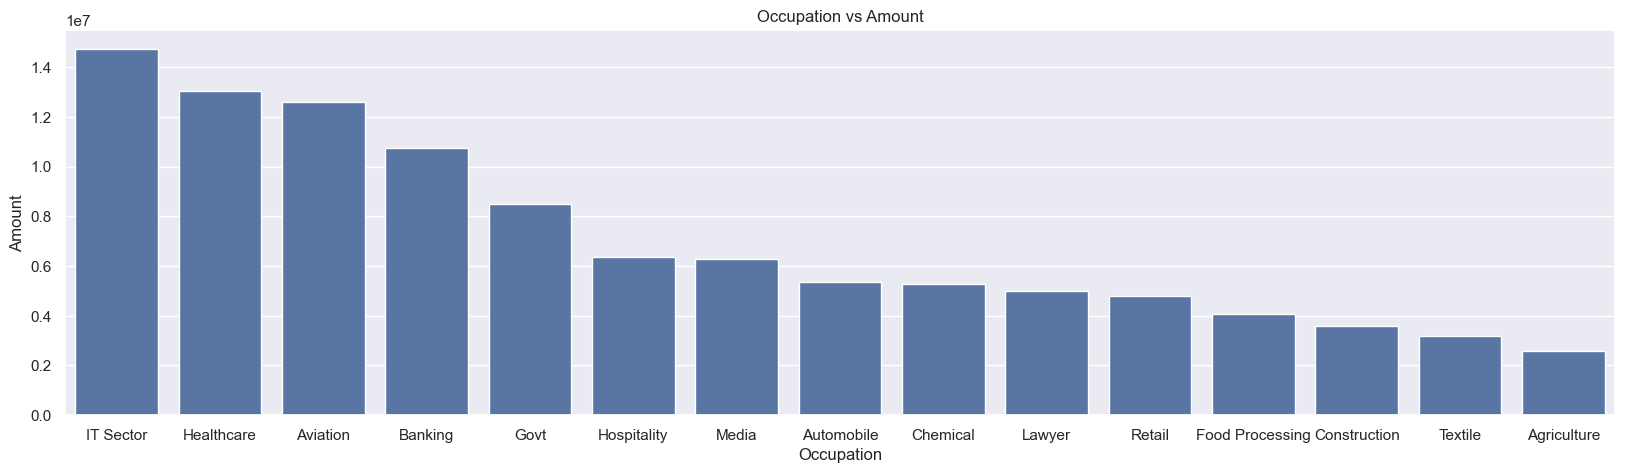

In [49]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Occupation vs Amount")
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

### Product Category

From the below visual data, we can observe that most of the sold products are from Food, Clothing and Electronics category.


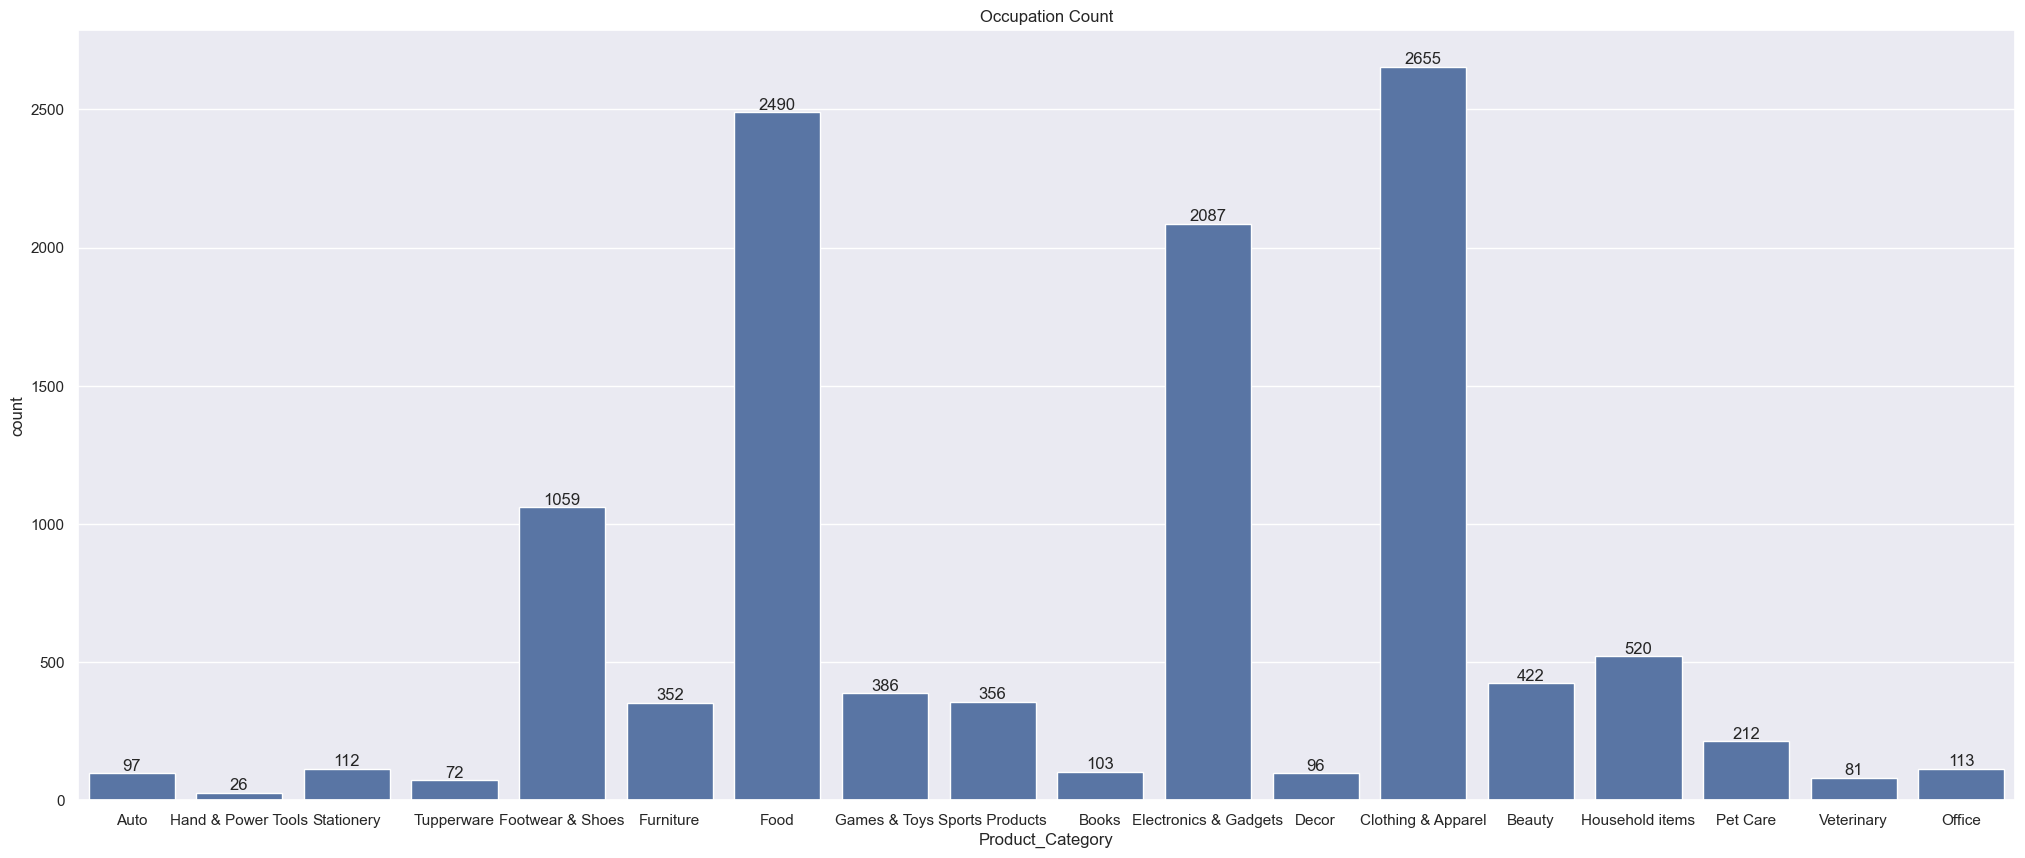

In [52]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.countplot(data = df, x = 'Product_Category')
plt.title("Occupation Count")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

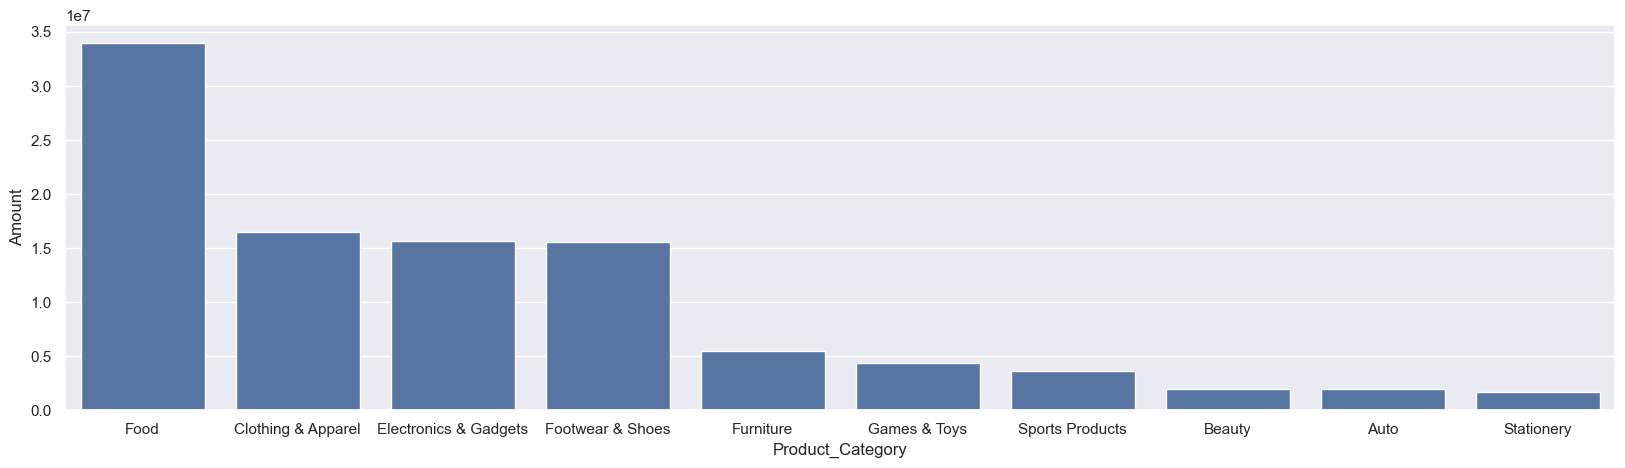

In [22]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<Axes: title={'center': 'Count of top 10 sold Products'}, xlabel='Product_ID'>

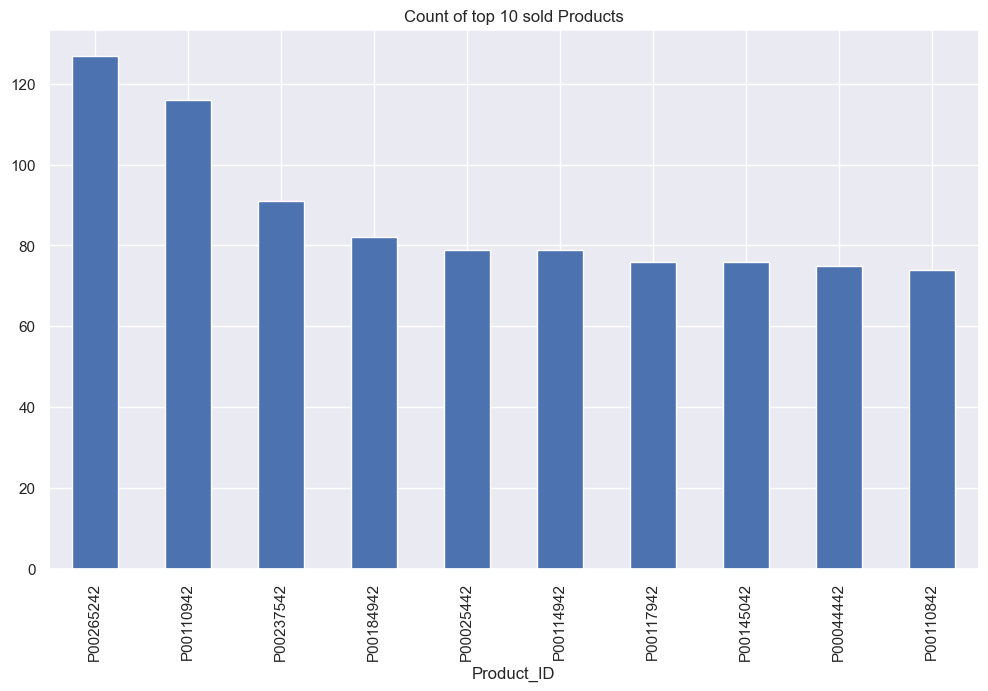

In [53]:
# TOP 10 MOST SOLD PRODUCTS

fig1, ax1 = plt.subplots(figsize=(12,7))
plt.title("Count of top 10 sold Products")
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category
